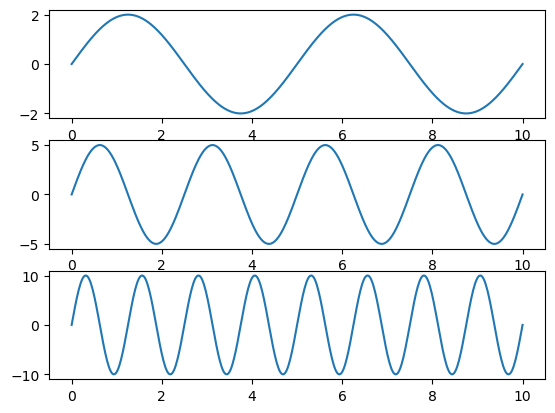

In [31]:
from scipy.fft import fft, fftfreq, ifft
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 512)

# amplitudes and frequency of three signals
a1, f1 = 2 , 0.2
a2, f2 = 5 , 0.4
a3, f3 = 10 , 0.8

# In time domain
y1 = a1 * np.sin(2 * np.pi * f1 * t) 
y2 = a2 * np.sin(2 * np.pi * f2 * t) 
y3 = a3 * np.sin(2 * np.pi * f3 * t)


plt.subplot(3,1,1)
plt.plot(t,y1)

plt.subplot(3,1,2)
plt.plot(t,y2)

plt.subplot(3,1,3)
plt.plot(t,y3)


plt.show()

In [32]:
print(t[1]-t[0])

0.019569471624266144


Text(0, 0.5, 'Amplitude')

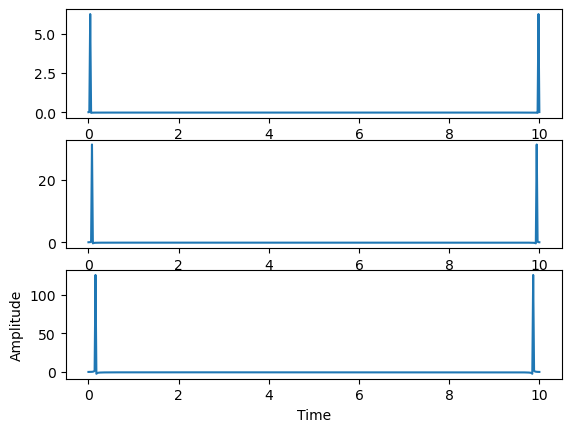

In [33]:
# Fourier Transform of three signals
yf1 = fft(y1)
yf2 = fft(y2)
yf3 = fft(y3)

plt.subplot(3,1,1)

plt.plot(t,yf1)

plt.subplot(3,1,2)
plt.plot(t,yf2)

plt.subplot(3,1,3)
plt.plot(t,yf3)

plt.xlabel('Time')
plt.ylabel('Amplitude')

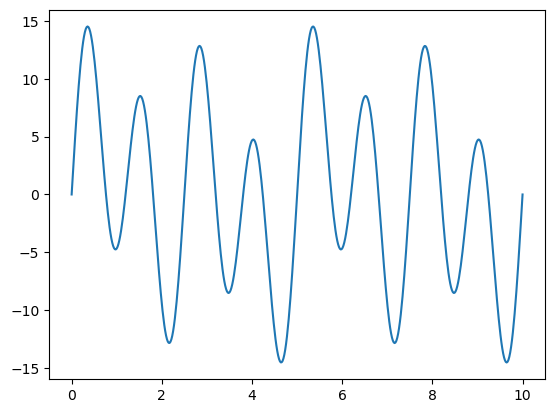

In [42]:
# combine 3 signals
y = y1+y2+y3
plt.plot(t,y)

Text(0.5, 1.0, 'Fourier transform')

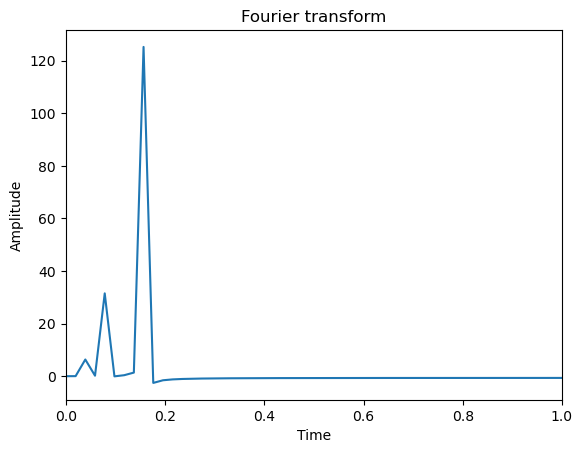

In [51]:
# In frequency domain
yf = fft(y)
plt.plot(t,yf)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(0,1)
plt.title('Fourier transform')

Text(0.5, 1.0, 'Signal obtained after inverse fourier transform')

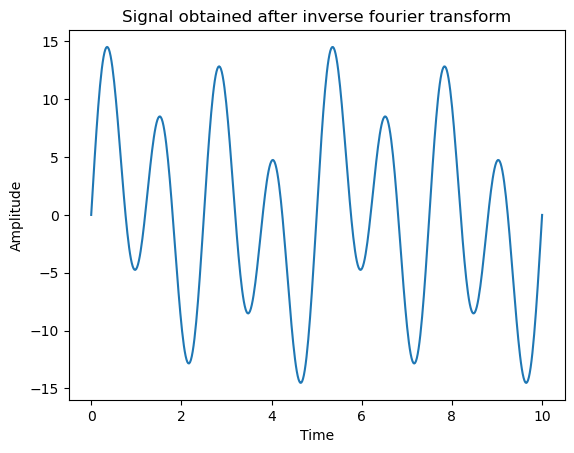

In [50]:
# Inverse Fourier transform 
yinv = ifft(yf)
plt.plot(t,yinv)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal obtained after inverse fourier transform')

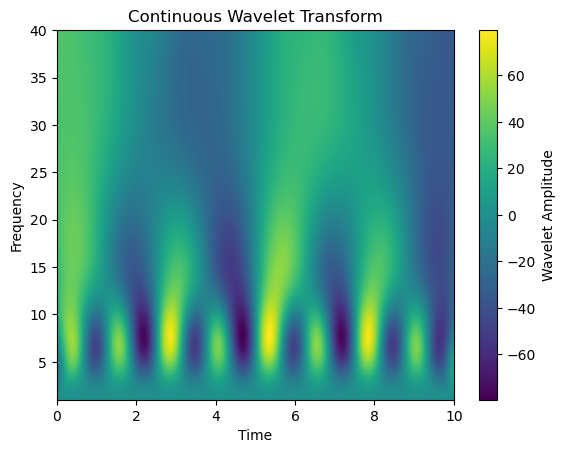

In [54]:
# continuous wavelet transform
from scipy import signal

widths = np.arange(1, 100)
wavelet = signal.cwt(y,signal.ricker,widths)

wavelet = np.flipud(wavelet)
plt.imshow(wavelet,extent=[0,10,1,40], aspect='auto')
plt.colorbar(label='Wavelet Amplitude')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Continuous Wavelet Transform')
plt.show()

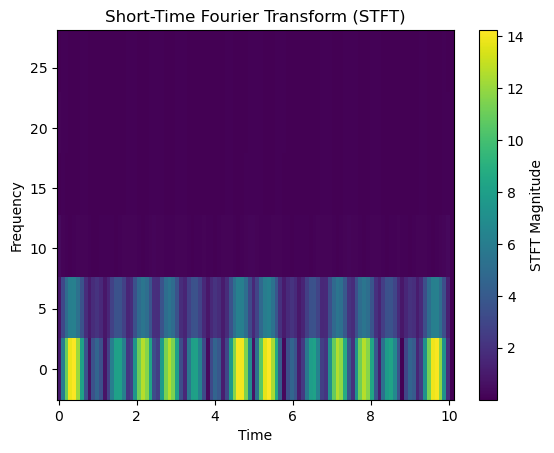

In [76]:
# Short time frequency transform (STFT)
from scipy.signal import stft

f_stft,t_stft, stft_data = 0,0,0
f_stft,t_stft, stft_data = stft(y, fs=1/(t[1]-t[0]),window = 'hamming', nperseg=10)

plt.pcolormesh(t_stft,f_stft, np.abs(stft_data),shading='auto')
plt.colorbar(label='STFT Magnitude')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Short-Time Fourier Transform (STFT)')
plt.show()

In [56]:
print(t[1]-t[0])

0.019569471624266144


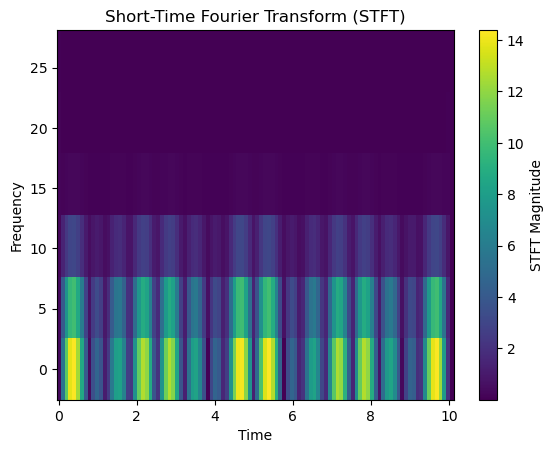

In [79]:
f_stft2,t_stft2, stft_data2 = 0,0,0

f_stft2,t_stft2, stft_data2 = stft(y, fs= 1/(t[1]-t[0]),window = signal.kaiser(10, beta=10), nperseg=10)

plt.pcolormesh(t_stft2,f_stft2, abs(stft_data2),shading='auto')
plt.colorbar(label='STFT Magnitude')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Short-Time Fourier Transform (STFT)')
plt.show()